In [ ]:
import pandas as pd
import numpy as np
import math
from datetime import date
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import six
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('HMXPC13_DI_v2_5-14-14.csv')

In [3]:
data = data.drop(['roles', 'incomplete_flag' , 'registered'], axis=1)

In [4]:
data['nevents'].fillna(0.0, inplace = True)

In [5]:
data['ndays_act'].fillna(0.0, inplace = True)

In [6]:
data['nplay_video'].fillna(0.0, inplace = True)

In [7]:
data['nchapters'].fillna(0.0, inplace = True)

In [8]:
data["last_event_DI"] = data.apply(lambda x: x.start_time_DI if pd.isnull(x.last_event_DI) else x.last_event_DI, axis =1)

In [9]:
data["start_time_DI"] = pd.to_datetime(data["start_time_DI"] )

In [10]:
data["last_event_DI"] = pd.to_datetime(data["last_event_DI"] ) 

In [11]:
data['days_active'] = data['last_event_DI'] - data['start_time_DI']

In [12]:
data['days_active'] = data['days_active'].apply(lambda x: x.days)

In [13]:
data['YoB'].fillna(int(data['YoB'].mean()), inplace = True)

In [14]:
now = datetime.datetime.now()

In [15]:
data['age'] = data['YoB'].apply(lambda x: now.year - int(x))

In [16]:
data['LoE_DI'] = data['LoE_DI'].fillna('UnknownLoE')

In [17]:
data = data.join(pd.get_dummies(data['LoE_DI']))

In [18]:
data['gender'].fillna('o', inplace = True)

In [19]:
data = data.join(pd.get_dummies(data['gender']))

In [20]:
data = data.loc[data['grade'] != " ",] 

In [21]:
data.dropna(axis=0, inplace=True)

In [22]:
data['grade'] = data['grade'].astype(float)

In [23]:
data.shape

(583738, 28)

In [24]:
df = pd.DataFrame(data)
df.keys()

Index(['course_id', 'userid_DI', 'viewed', 'explored', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'days_active', 'age', 'Bachelor's',
       'Doctorate', 'Less than Secondary', 'Master's', 'Secondary',
       'UnknownLoE', 'f', 'm', 'o'],
      dtype='object')

In [25]:
excluded_columns = ['course_id','userid_DI', 'final_cc_cname_DI', 'start_time_DI', 'last_event_DI', 'LoE_DI','YoB', 'gender','grade']

In [26]:
x=df.drop(excluded_columns, axis=1)

In [27]:
y=df['grade']

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 0.005282369656840525


In [31]:
print ('Number of coefficients', len(lm.coef_))

Number of coefficients 19


In [32]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,viewed,-0.002574
1,explored,0.043405
2,certified,0.647851
3,nevents,0.000012
4,ndays_act,0.000930
5,nplay_video,-0.000018
6,nchapters,0.003132
7,nforum_posts,-0.003061
8,days_active,-0.000002
9,age,-0.000180


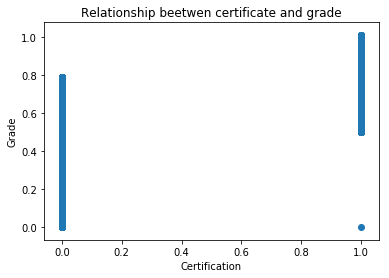

In [33]:
plt.scatter(df['certified'],df['grade'])
plt.xlabel("Certification")
plt.ylabel("Grade")
plt.title("Relationship beetwen certificate and grade")
plt.show()


In [34]:
mseFull = np.mean((y-lm.predict(x))**2)
mseFull

0.0021141531838159253

In [35]:
x=df[['nevents','ndays_act','nplay_video','nchapters','nforum_posts','days_active']]

In [36]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,nevents,0.000043
1,ndays_act,0.003926
2,nplay_video,-0.000082
3,nchapters,0.012674
4,nforum_posts,-0.013590
5,days_active,-0.000051


In [38]:
mseFull = np.mean((y-lm.predict(x))**2)
mseFull

0.008005704329480213

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pd.DataFrame(list(zip(x_train.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,nevents,0.000043
1,ndays_act,0.003960
2,nplay_video,-0.000084
3,nchapters,0.012508
4,nforum_posts,-0.013066
5,days_active,-0.000050


In [42]:
x=df[['age','m','f']]

In [43]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
pd.DataFrame(list(zip(x_train.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,age,-0.000136
1,m,-0.019820
2,f,-0.011740


In [46]:
x=df[["Bachelor's",'Doctorate', 'Less than Secondary', "Master's", 'Secondary','UnknownLoE']]

In [47]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,Bachelor's,-1.504210e+07
1,Doctorate,-1.504210e+07
2,Less than Secondary,-1.504210e+07
3,Master's,-1.504210e+07
4,Secondary,-1.504210e+07
5,UnknownLoE,-1.504210e+07
